In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *


2024-10-16 16:33:18.207282: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 16:33:18.870068: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-10-16 16:33:18.870148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2024-10-16 16:33:18.870158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
N_objects = 2000
confidence = .95

objects_dict = {
  'delta_uniform': lambda : np.array([generate_random_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)]),
  # 'delta_nonuniform': lambda: np.array([generate_random_object('delta', num_deltas=1, gaussian_mixture_position=True) for i in range(N_objects)]),
  'white_noise': lambda : np.array([generate_random_object('white_noise') for i in range(N_objects)]),
  # 'pink_noise': lambda : np.array([sample_amplitude_object('pink_noise') for i in range(N_objects)]),
  '8_deltas_uniform': lambda :np.array([generate_random_object('delta', num_deltas=8, gaussian_mixture_position=False) for i in range(N_objects)]),
  # '8_deltas_nonuniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=True) for i in range(N_objects)]),
}


noise_sigma_list = [1e-6, 1e-5, 1e-4, 1e-3, 4e-3]

num_nyquist_samples = 16
num_mi_models = 5

mi_by_object = {}
mi_by_object_lo = {}
mi_by_object_hi = {}
for name, objects_fn in objects_dict.items():
  print(name)
  mutual_information = []
  mi_lo = []
  mi_hi = []
  for noise_sigma in tqdm(noise_sigma_list):

    initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi, optimized_mi_lower, optimized_mi_upper = optimize_PSF_and_estimate_mi(
        objects_fn, noise_sigma, num_nyquist_samples=num_nyquist_samples, verbose=False, confidence=confidence,   num_mi_models=num_mi_models,     max_epochs = 2000, estimate_with_pixel_cnn=True,)

    mutual_information.append(optimized_mi)
    mi_lo.append(optimized_mi_lower)
    mi_hi.append(optimized_mi_upper)
  mi_by_object[name] = mutual_information
  mi_by_object_lo[name] = mi_lo
  mi_by_object_hi[name] = mi_hi

delta_uniform


  0%|                                                                             | 0/5 [00:00<?, ?it/s]2024-10-16 16:34:09.857694: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.

training:  96%|████████████████████████████████████████████████████▊  | 192/200 [04:23<00:10,  1.37s/it]

training:  24%|█████████████▍                                          | 48/200 [01:06<03:30,  1.38s/it]

training:  78%|██████████████████████████████████████████▉            | 156/200 [03:17<00:55,  1.27s/it]

training:  60%|█████████████████████████████████                      | 120/200 [02:34<01:43,  1.29s/it]

training:  32%|█████████████████▋                                      | 63/200 [01:29<03:14,  1.42s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:12, 12.85s/it]
Evaluating NLL: 7it [00:24,  3.57s/it]

Evaluating NLL: 0it [00:00, ?it/s]


white_noise


training:  23%|████████████▉                                           | 46/200 [00:51<02:52,  1.12s/it]

training:  23%|████████████▉                                           | 46/200 [00:41<02:20,  1.10it/s]

training:  23%|████████████▉                                           | 46/200 [01:03<03:31,  1.38s/it]

training:  26%|██████████████▊                                         | 53/200 [01:14<03:26,  1.40s/it]

training:  22%|████████████▌                                           | 45/200 [01:04<03:42,  1.43s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.05it/s]
Evaluating NLL: 7it [00:01,  3.68it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.00it/s]
Evaluating NLL: 7it [00:01,  3.64it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.04it/s]
Evaluating NLL: 7it [00:01,  3.69it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:01,  1.12s/it]
Evaluating NLL: 7it [00:02,  3.32it/s]

Evaluating NLL

8_deltas_uniform


training:  69%|█████████████████████████████████████▉                 | 138/200 [03:02<01:21,  1.32s/it]

training: 100%|███████████████████████████████████████████████████████| 200/200 [03:07<00:00,  1.07it/s]

training:  61%|█████████████████████████████████▌                     | 122/200 [01:57<01:14,  1.04it/s]

training: 100%|███████████████████████████████████████████████████████| 200/200 [03:59<00:00,  1.20s/it]

training:  73%|████████████████████████████████████████▏              | 146/200 [03:15<01:12,  1.34s/it]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.02it/s]
Evaluating NLL: 7it [00:01,  3.66it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.00it/s]
Evaluating NLL: 7it [00:01,  3.65it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.07it/s]
Evaluating NLL: 7it [00:01,  3.79it/s]

Evaluating NLL: 0it [00:00, ?it/s]
Evaluating NLL: 1it [00:00,  1.09it/s]
Evaluating NLL: 7it [00:01,  3.77it/s]

Evaluating NLL

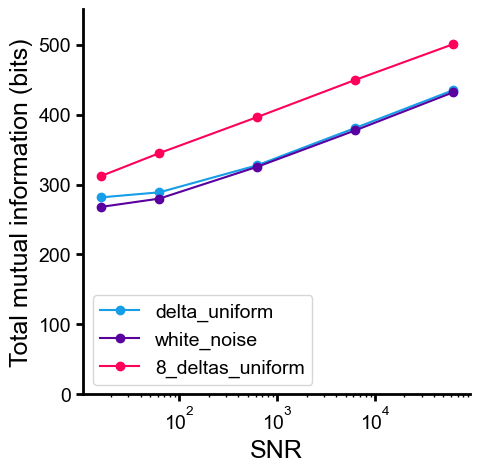

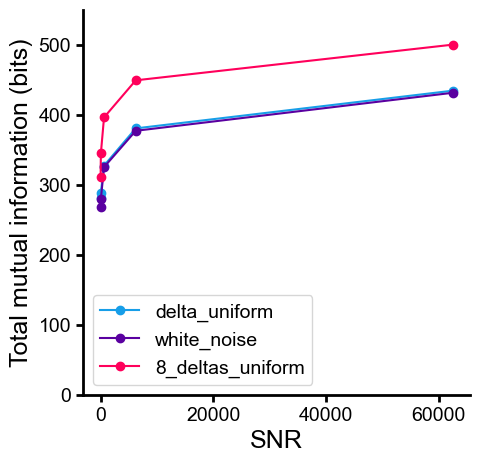

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

snr = (1 / (num_nyquist_samples)) / np.array(noise_sigma_list)

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * num_nyquist_samples
    total_mi_lo = np.array(mi_by_object_lo[object_name]) * num_nyquist_samples
    total_mi_hi = np.array(mi_by_object_hi[object_name]) * num_nyquist_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.semilogx(snr, total_mi, 'o-', label=object_name)
    ax.fill_between(snr, total_mi_lo, total_mi_hi, alpha=0.2)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_snr_log_scale' + '.pdf', transparent=True, dpi=600)


fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * num_nyquist_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(snr, total_mi, 'o-', label=object_name)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'mi_vs_snr_linear_scale' + '.pdf', transparent=True, dpi=600)
